In [12]:
import pandas as pd
import numpy as np
#import pickle
from sklearn.model_selection import train_test_split

In [13]:
path_2_train_file = r'C:\Users\John Broekhuis\Documents\ESCP\ML Python\train.csv'
df = pd.read_csv(path_2_train_file)

In [14]:
df.columns

Index(['label', 'id', 'visitTime', 'purchaseTime', 'hour', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'C9', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'C10', 'C11', 'C12'],
      dtype='object')

In [15]:
label = df['label'].values

In [51]:
data = df.drop(columns=['label','id','visitTime','purchaseTime']).values

In [21]:
X = data.copy()
y = np.array(label.copy())
y[:5]
X[:1]

array([[         0, 2569487005, 1830830742, 4228834423,  652481754,
        2967512603, 3624739744, 2303407174, 2206061889,          0,
        4287642944,          0,          0,          0,          0,
                 0,          0,          0,          0,          0,
         419316267, 3617851689, 4220791646]], dtype=int64)

# Split train & test


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1234)

# Modelling



### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(n_estimators=100,
    random_state=1337,
    max_depth=6,
    min_samples_leaf=1,
    verbose=2)

In [33]:
RFclf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1337,
                       verbose=2, warm_start=False)

In [34]:
y_pred_RFclf = RFclf.predict(X_test)
pred_RFclf = RFclf.predict_proba(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RFclf))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      6278
           1       1.00      0.50      0.67         8

    accuracy                           1.00      6286
   macro avg       1.00      0.75      0.83      6286
weighted avg       1.00      1.00      1.00      6286



In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_RFclf))

[[6278    0]
 [   4    4]]


In [38]:
from sklearn.model_selection import cross_val_score
RF_scores = cross_val_score(RFclf, X, y, scoring='roc_auc',n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(RF_scores))

Mean ROC AUC: 0.989


### Test set and results

In [53]:
test = pd.read_csv(r'C:\Users\John Broekhuis\Documents\ESCP\ML Python\test1.csv')

In [54]:
ID = test['id']
del test['label']

In [55]:
test = test.drop(columns=['id', 'visitTime', 'purchaseTime']).values

In [65]:
predictions = pd.Series(RFclf.predict(test), name='predicted_value')
cols = ['predicted_value', 'probabilities']
probabilities = pd.DataFrame(RFclf.predict_proba(test), columns=cols)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


,predicted_value,probabilities
0,0.999705,0.000295
1,0.999961,0.000039
2,0.999933,0.000067


In [68]:
probabilities.to_csv("Prediction_RF_Maximilian_Broekhuis.csv")

## SVM 

In [69]:
from sklearn.svm import SVC
clf = SVC(C=1.0,
          kernel='rbf',
          gamma='auto',
          coef0=0.0,
          tol=0.001,
          probability=True,
          max_iter=-1)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
probabilities = pd.DataFrame(clf.predict_proba(X_test) columns=['Predicted','Probabilities'])

In [ ]:
probabilities.to_csv("Prediction_SVM_Maximilian_Broekhuis")

In [66]:
test['predicted_value'] = probabilities['predicted_value']
test['probabilities'] =probabilities['probabilities']
test['ID'] = ID
# Build scored dataset
results_test = pd.DataFrame()
results_test['ID'] = test['ID']
results_test['predicted_value'] = test['predicted_value']
results_test['probabilities'] = test['probabilities']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
results_test.set_index('ID')

In [ ]:
results_test.to_csv("Prediction_RF_Maximilian_Broekhuis.csv")



import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf = xgb.XGBClassifier(
                    max_depth=3,
                    learning_rate=0.2,
                    gamma=0.0,
                    min_child_weight=0.0,
                    max_delta_step=0.0,
                    subsample=1.0,
                    colsample_bytree=1.0,
                    colsample_bylevel=1.0,
                    reg_alpha=0.0,
                    reg_lambda=1.0,
                    n_estimators=12,
                    silent=0,
                    nthread=4,
                    scale_pos_weight=1.0,
                    base_score=0.5,
                    seed=1337,
                    missing=None,
                  )


In [15]:
Y_pred = clf.predict(dTest)
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6275
           1       0.27      0.67      0.38        12

    accuracy                           1.00      6287
   macro avg       0.63      0.83      0.69      6287
weighted avg       1.00      1.00      1.00      6287



In [16]:
Y_pred = clf.predict(dtrain)
print(classification_report(Y_train,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25096
           1       0.26      0.89      0.40        45

    accuracy                           1.00     25141
   macro avg       0.63      0.94      0.70     25141
weighted avg       1.00      1.00      1.00     25141



In [19]:
Y_to_pred = clf.predict(dPred)
print([len(np.where(Y_to_pred==i)[0]) for i in range(nb_class)])


[31244, 184]


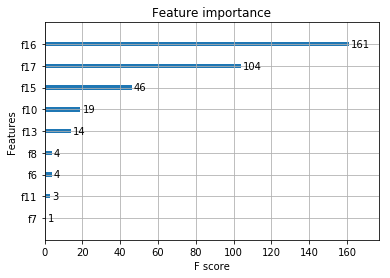

In [17]:
xgb.plot_importance(clf, importance_type = 'weight', max_num_features=15)
plt.show()

As we may seen, the baseline model is not so good. You should do some improvements. Here is one of the final results that we've obtained:

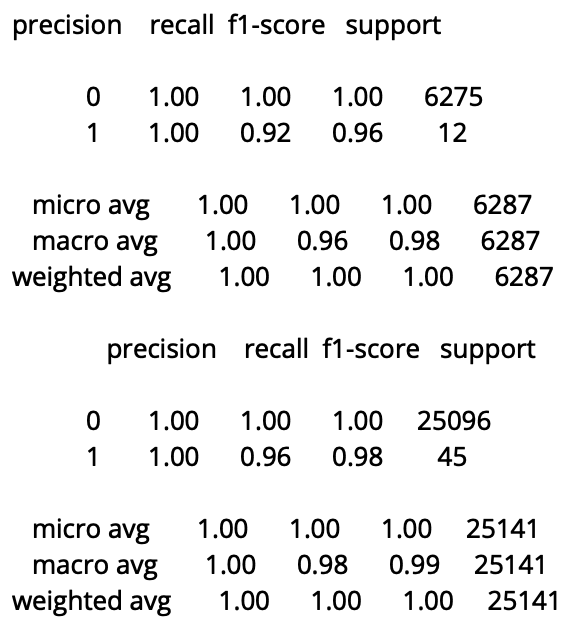